##### Code Description
In this code, two methods are used to solve a non-stationary 10-armed bandit problem.
The first method uses sample averages as estimators of the expected values of each action. In other words, the learning rate (alpha) is equal to 1/n in each time step where n indicates the time step.
In the second method, we use a constant learning rate.

Values of the actions are set to zero initially, and a noise of Normal distribution(0, 0.01) is added to the values in every time step.

Two implementations are available for the function `avgReward_optimalAction`. If the `vectorized` argument of the function is set to True, the vectorized implementation will be used.The vectorized implementation reduces the execution time by almost 94%.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [61]:
def avgReward_optimalAction(runs, steps, k, noise_mean, var, noise_var, epsilon, type, vectorized = True):
    
    expected_reward = np.zeros(steps)
    optimal_action_count = np.zeros(steps)

    if vectorized:
        q = np.zeros((runs, k))
        Q = np.zeros((runs, k))
        N = np.zeros((runs, k))

        for t in range(steps):

            i = Q.argmax(axis = 1).astype(int) + np.multiply((np.random.rand(runs) < epsilon).astype(int),(np.random.randint(0, k, runs) - Q.argmax(axis = 1).astype(int)))

            r = np.random.normal(q[np.arange(runs), i], var)

            optimal_action_count[t] = np.sum((i == q.argmax(axis = 1)).astype(float))

            N[np.arange(runs), i] += 1

            if type == "sample-average":
                alpha = 1.0 / N[np.arange(runs), i]
            elif type == "constant-step-size":
                alpha = np.full(runs, 0.1)
            
            Q[np.arange(runs), i] += np.multiply(alpha, (r - Q[np.arange(runs), i]))

            expected_reward[t] = (epsilon * Q.sum(axis = 1) / k + (1.0 - epsilon) * Q.max(axis = 1)).mean()

            q += np.random.normal(0, noise_var, (runs, k))
    
    else:
        for _ in range(runs):

            q = np.zeros(k)
            Q = np.zeros(k)
            N = np.zeros(k)

            for t in range(steps):

                if np.random.rand() < epsilon:
                    i = np.random.randint(k)
                else:
                    i = np.argmax(Q)
                r = np.random.normal(q[i], var)

                if i == np.argmax(q):
                    optimal_action_count[t] += 1

                N[i] += 1

                if type == "sample-average":
                    alpha = 1.0 / N[i]
                elif type == "constant-step-size":
                    alpha = 0.1

                Q[i] += alpha * (r - Q[i])

                expected_reward[t] += epsilon * Q.sum() / k + (1 - epsilon) * Q.max()

                q += np.random.normal(noise_mean, noise_var, k)

    optimal_action_count /= runs

    return expected_reward, optimal_action_count

Expected reward in the last 3 steps: [4.33425412 4.87387052 2.30554336]
Estimators in the last 3 steps: [[ 1.49437251e+00 -2.15319656e+00 -1.65862552e+00  1.96994698e+00
   3.46878360e-01  7.17004198e-02  4.79027256e+00  5.23316671e-01
  -3.73267906e-03 -3.08005151e+00]
 [ 6.40690549e-01  6.57589005e-01  5.96494842e-01 -6.81408566e-01
  -7.16909687e-01  4.54698449e-02  2.05224540e+00  1.55584725e+00
   1.22273134e+00  5.29686047e+00]
 [ 2.53604765e+00  5.24798592e-01  1.43248516e+00 -4.50535629e+00
  -1.60817185e+00 -3.23242273e-01  1.01278883e+00  1.52478914e+00
  -6.85235774e-02  1.78443191e+00]]
Expected reward in the last 3 steps: [7.52947676 7.35225092 3.67994349]
Estimators in the last 3 steps: [[ 2.00899580e+00  3.08854297e+00  1.62605214e+00  3.33777115e+00
   8.19984126e+00  1.45817508e-01  1.38740948e+00  1.96690941e+00
  -1.94768810e+00 -4.85168937e+00]
 [-3.24756072e+00 -6.03846517e+00  8.24470920e+00 -6.02267194e-01
  -7.24239531e-01  1.41748969e+00 -1.49047295e+00 -1.3631

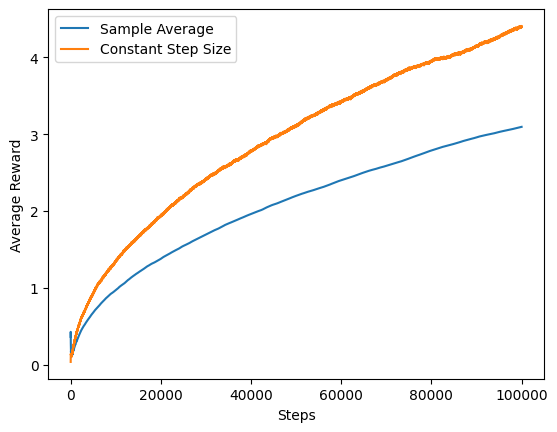

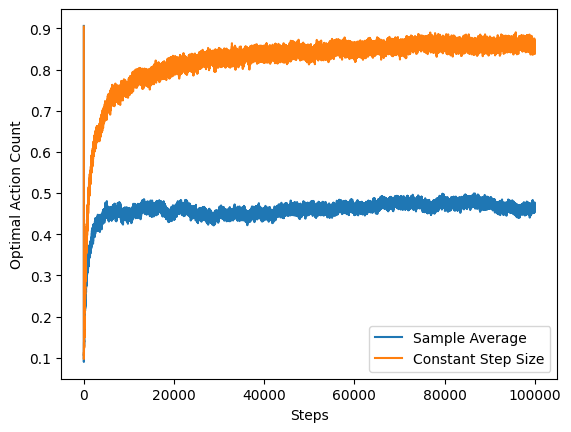

In [63]:
steps = 10000
epsilon = 0.1
var = 1.0
noise_mean = 0.0
noise_var = 0.01
runs = 2000
k = 10

avgReward_sample_average, OAC_sample_average = avgReward_optimalAction(runs, steps, k, noise_mean, var, noise_var, epsilon, "sample-average", True)
avgReward_constant_step_size, OAC_constant_step_size = avgReward_optimalAction(runs, steps, k, noise_mean, var, noise_var, epsilon, "constant-step-size", True)
x = np.arange(steps)

plt.plot(x, avgReward_sample_average, label='Sample Average')
plt.plot(x, avgReward_constant_step_size, label='Constant Step Size')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.show()

plt.plot(x, OAC_sample_average, label='Sample Average')
plt.plot(x, OAC_constant_step_size, label='Constant Step Size')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Optimal Action Count')
plt.show()